In [0]:
import numpy as np
import matplotlib.pyplot as plt


# Define global variables for the problem
p_h = 0.55
p_l = 0.45
c_l = 10
c_h = 50
prize = 1000

high = 0
low = 1

# number of actions
n_actions = 2
actions = [high, low]

# two outcomes
win = 0
lose = 1

n_outcomes = 2

# number of rounds
d = 3

# states encoded as 0, 1, ..., 2d
states = np.arange(0,2*d+1) 
n_states = len(states)

class Game:
    def __init__(self, init_state):
        self.initial_state = init_state
        self.state = self.initial_state
        self.reward = 0.0
        self.is_terminal = False

    def outcome(self, action):
        if action == high:
            is_won = np.random.binomial(1, p_h)
        else:
            is_won = np.random.binomial(1, p_l)
        return is_won

    def step(self, action):
        if action == high:
            self.reward = -c_h
        else:
            self.reward = -c_l    
      
        is_won = self.outcome(action)
        
        if self.state == 2*d-1 and is_won:
            self.state += 1
            self.reward += prize
            self.is_terminal = True
        elif self.state == 1 and not is_won:
            self.state -= 1
            self.is_terminal = True
        else:
            if is_won:
                self.state += 1
            else:
                self.state -= 1
            self.is_terminal = False
        return self.state, self.reward, self.is_terminal

    def reset(self):
        self.state = self.initial_state
        self.reward = 0.0
        self.is_terminal = False
        return self.state


def eps_greedy_policy(qsa, epsilon=0.1):
    if np.random.binomial(1, epsilon) == 1:
        return np.random.choice(actions)
    else:
        return np.random.choice([action_ for action_, value_ in enumerate(qsa) if value_ == np.max(qsa)])


def q_learning(qsa, next_qs, r, alpha=0.1, gamma=1.0):
    return qsa + alpha * (r + gamma * np.max(next_qs) - qsa)


def sarsa(qsa, next_qsa, r, alpha=0.1, gamma=1.0):
    return qsa + alpha * (r + gamma * next_qsa - qsa)
  
  
def plot_rewards(r_sarsa, r_qlearning):
    plt.figure(figsize=(9, 4))
  
    ax = plt.subplot(121)
    plt.plot(r_qlearning)
    plt.title('Q-learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episodes')

    ax = plt.subplot(122)
    plt.plot(r_sarsa)
    plt.title('Sarsa')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episodes')
    plt.show()
    

In [0]:
init_state = d
env = Game(init_state)
env_sarsa = Game(init_state)
episodes = 500000

rewards_sarsa = np.zeros(episodes)
rewards_qlearning = np.zeros_like(rewards_sarsa)
runs = 1

In [0]:
for r in range(runs):
    q_values = np.zeros((n_states, n_actions))
    q_sarsa = np.zeros_like(q_values)
    
    for e in range(episodes):
        state = env.reset()
        state_sarsa = env_sarsa.reset()
        done = False
        done_sarsa = False
        a_sarsa = eps_greedy_policy(q_sarsa[state_sarsa, :])
        g = 0.0
        g_sarsa = 0.0

        while not done:
            a = eps_greedy_policy(q_values[state, :])
            next_state, r, done = env.step(a)
            g += r
            q_values[state, a] = q_learning(q_values[state, a], q_values[next_state, :], r)
            state = next_state

        while not done_sarsa:
            next_state_sarsa, r_sarsa, done_sarsa = env_sarsa.step(a_sarsa)
            next_a = eps_greedy_policy(q_sarsa[next_state_sarsa, :])
            g_sarsa += r_sarsa
            q_sarsa[state_sarsa, a_sarsa] = sarsa(q_sarsa[state_sarsa, a_sarsa], q_sarsa[next_state_sarsa, next_a], r_sarsa)
            state_sarsa = next_state_sarsa
            a_sarsa = next_a

        rewards_sarsa[e] += g_sarsa
        rewards_qlearning[e] += g

In [0]:
q_optimal_policy = np.argmax(q_values, axis=1)
print('Values found by Q-learning:\n', q_values)
print('Optimal policy found by Q-learning:\n', q_optimal_policy[1:2*d])

Values found by Q-learning:
 [[  0.           0.        ]
 [ -2.18407769  20.87325583]
 [124.86018719 127.16786423]
 [252.52007443 320.75987089]
 [495.14654219 363.29311447]
 [674.25331492 730.51882365]
 [  0.           0.        ]]
Optimal policy found by Q-learning:
 [1 1 1 0 1]


In [0]:
sarsa_optimal_policy = np.argmax(q_sarsa, axis=1)
print('Values found by SARSA:\n', q_sarsa)
print('Optimal policy found by Q-learning:\n', sarsa_optimal_policy[1:2*d])

Values found by Q-learning:
 [[  0.           0.        ]
 [ -9.14246617   7.75118176]
 [ 46.51310168  68.62658103]
 [112.06060784 170.62011208]
 [303.98160025 331.59042815]
 [687.7901223  540.70394513]
 [  0.           0.        ]]
Optimal policy found by Q-learning:
 [1 1 1 1 0]


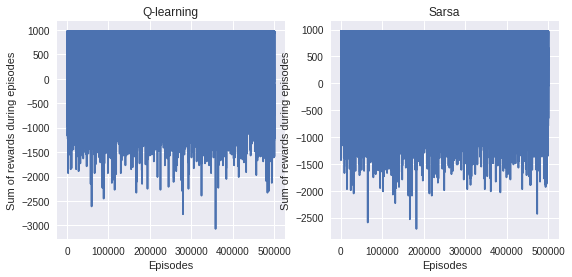

In [0]:
rewards_sarsa /= runs
rewards_qlearning /= runs
plot_rewards(rewards_sarsa, rewards_qlearning)